<a href="https://colab.research.google.com/github/VivianeMatosOliveira/Curso_Analista_Dados/blob/main/Exercicios/modulo_26_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [ ]:
iris.rename(columns = {'sepal_length':'comprimento_sepala','sepal_width':'largura_sepala',	'petal_length':'comprimento_petala','petal_width':'largura_petala'}, inplace = True)

In [ ]:
iris.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
comprimento_sepala,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
largura_sepala,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
comprimento_petala,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
largura_petala,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

In [ ]:
iris.corr()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
comprimento_sepala,1.000000,-0.117570,0.871754,0.817941
largura_sepala,-0.117570,1.000000,-0.428440,-0.366126
comprimento_petala,0.871754,-0.428440,1.000000,0.962865
largura_petala,0.817941,-0.366126,0.962865,1.000000


 - Atributos preditivos:

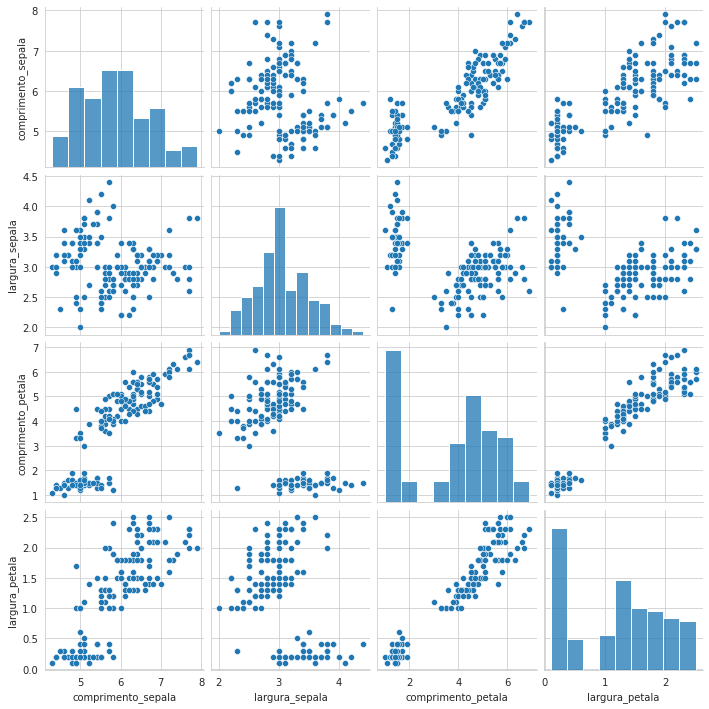

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** 

*  O comprimento da sépala tem relação com os atributos comprimento e largura da pétala;

*  A largura da sépala não tem relação com os atributos comprimento da sépala e com o comprimento e largura da pétala;

*  O comprimento da pétala tem relação com o comprimento da sepala e com a largura da pétala, porém não há relação desse atributo com a largura da sépala;

*  A largura da pétala tem relação com os atributos comprimento da sepala e com o comprimento da pétala.

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sepala  150 non-null    float64
 1   largura_sepala      150 non-null    float64
 2   comprimento_petala  150 non-null    float64
 3   largura_petala      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris.isnull().sum()

comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
dtype: int64

A base de dados não possuem valores nulos

### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

As variáveis numericas estão na mesma escala, não sendo necessário a padronização

### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [ ]:
# resposta da questão 2.3

Visto que não houve a necessidade de padronização, também será desnecessária a limpeza.

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [ ]:
# resposta da questão 3.1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()

In [ ]:
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(iris)
  wcss.append(model.inertia_)

### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [ ]:
# resposta da questão 3.2

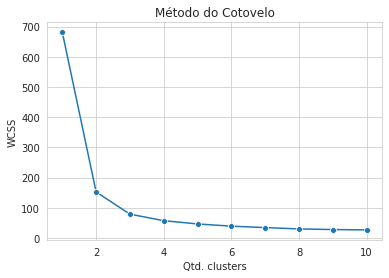

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

 - **4 clusters**

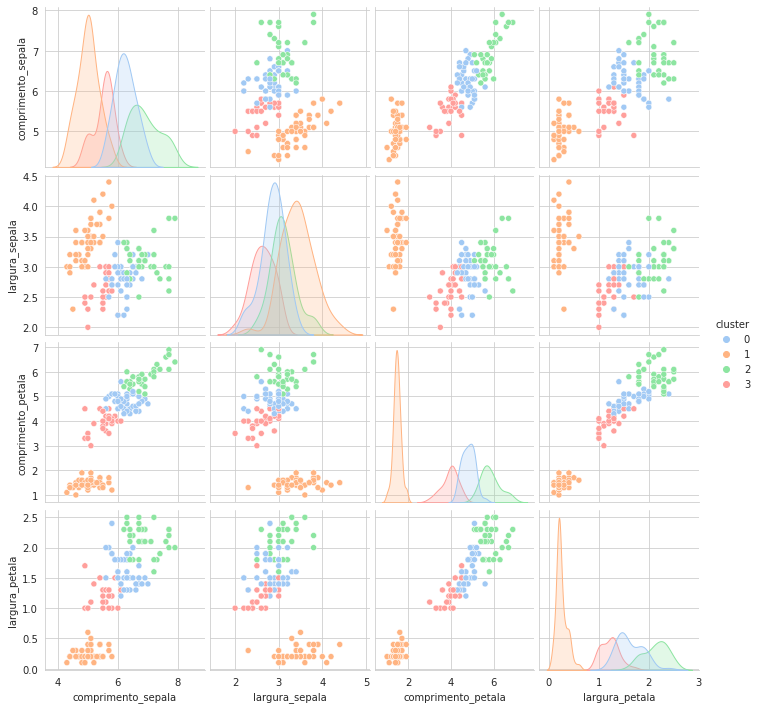

In [ ]:
model = KMeans(n_clusters=4)
model = model.fit(iris)

clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

 **3 clusters**

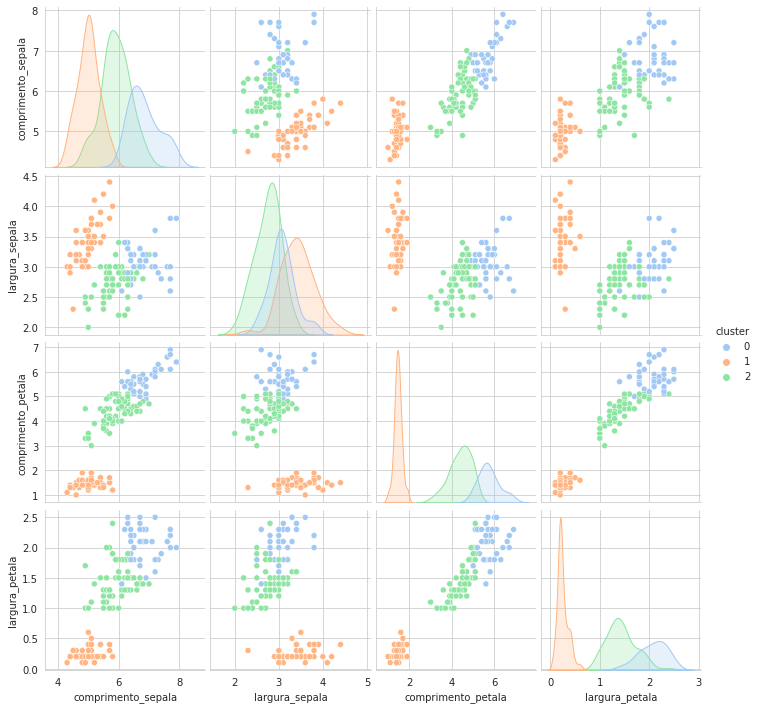

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(iris)

clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

 **2 clusters**

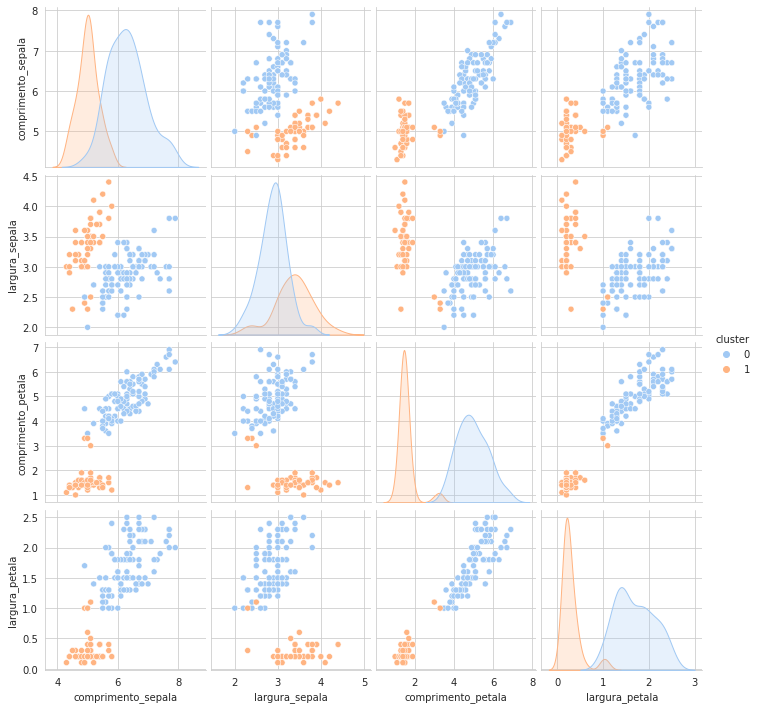

In [ ]:
model = KMeans(n_clusters=2)
model = model.fit(iris)

clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [ ]:
# resposta da questão 3.3.a

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(iris)

In [ ]:
model.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'auto',
 'feature_names_in_': array(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
        'largura_petala'], dtype=object),
 'n_features_in_': 4,
 '_n_init': 10,
 '_tol': 0.00011356176666666667,
 '_algorithm': 'elkan',
 '_n_threads': 2,
 'cluster_centers_': array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 

In [ ]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=['cluster'])
clusters.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [ ]:
clustered_data = pd.concat([iris, clusters], axis=1)
clustered_data.head()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

In [ ]:
# resposta da questão 3.3.b

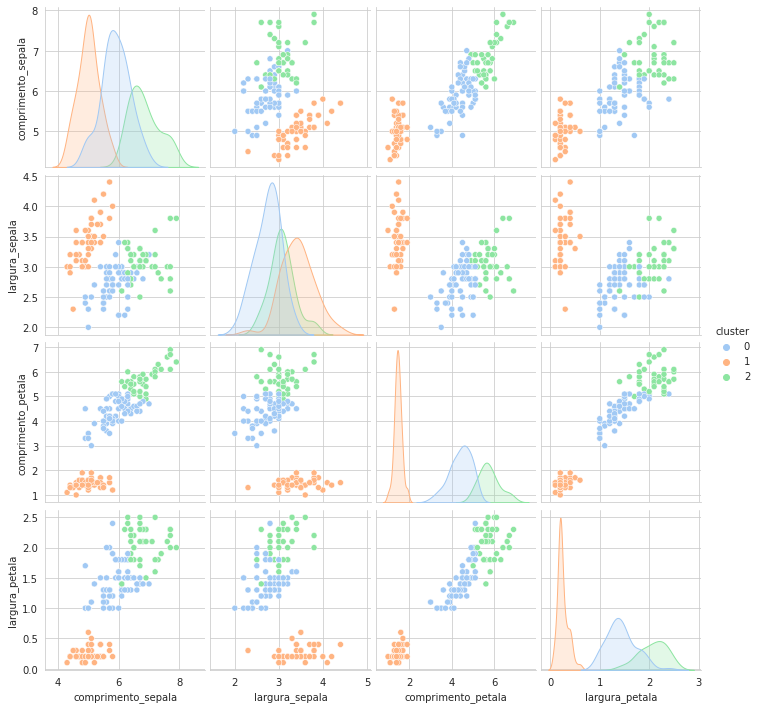

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

**Comentário:** ?

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [ ]:
# resposta da questão 4.1

In [ ]:
flor = np.array([5.1, 3.5, 1.4,0.2])

In [ ]:
cluster = model.predict(flor.reshape(1, -1))
print(cluster)

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
